<a href="https://colab.research.google.com/github/Charlotte-99/Y3Project/blob/main/CMB_Training_Data_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Training Data

This notebook generates alternative cosmic microwave background (CMB) maps using the same power spectrum given by the real CMB.

This notebook requires the installation of the pyshtools module.

In [ ]:
!pip install pyshtools
!pip install geos, cython, shapely, pyshp, six
!pip install git+https://github.com/SciTools/cartopy.git

ERROR: Invalid requirement: 'geos,'
  Cloning https://github.com/SciTools/cartopy.git to /tmp/pip-req-build-8nxn1xcf
  Running command git clone -q https://github.com/SciTools/cartopy.git /tmp/pip-req-build-8nxn1xcf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 4.1MB/s 
  Created wheel for Cartopy: filename=Cartopy-0.18.1.dev207+g8b106fe-cp37-cp37m-linux_x86_64.whl size=12515152 sha256=5b80b806b9fa504e7b345e198528eac5a4e37ece2a115db4bffc31855c79deda
  Stored in directory: /tmp/pip-ephem-wheel-cache-g09b1bu9/wheels/ac/33/64/1a2fddaf0a5f699bb6848296a57ca902f5320baa86e8518b3b
Successfully built Cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=cd7619150c53bd3125ee00e97521d8bdec1bcfe10f9960285fc65104b95be691
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfull

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import cartopy.crs as ccrs

from google.colab import files
from matplotlib.colors import ListedColormap

In [ ]:
# Import planck colourmap and power spectrum data
uploaded = files.upload()

Saving planck_map.txt to planck_map.txt
Saving camb_11312141_scalcls.txt to camb_11312141_scalcls.txt


In [ ]:
# Load in power spectrum data and colourmap data
power_spectrum = np.loadtxt('camb_11312141_scalcls.txt')

colombi1_cmap = ListedColormap(np.loadtxt("planck_map.txt")/255.)
cmap = colombi1_cmap

# Preview power spectrum data and print shape
print(power_spectrum[:10])
print(power_spectrum.shape)

[[2.0000e+00 1.2078e+03 5.2833e-02 3.4374e+00 1.0831e+06 3.4113e+04]
 [3.0000e+00 1.1251e+03 8.6628e-02 4.3324e+00 1.6670e+06 4.0487e+04]
 [4.0000e+00 1.0486e+03 9.7685e-02 4.4600e+00 2.1840e+06 4.3435e+04]
 [5.0000e+00 9.8949e+02 8.6908e-02 4.1313e+00 2.6398e+06 4.4550e+04]
 [6.0000e+00 9.4654e+02 6.4326e-02 3.6044e+00 3.0414e+06 4.4649e+04]
 [7.0000e+00 9.1684e+02 4.0891e-02 3.0198e+00 3.3968e+06 4.4207e+04]
 [8.0000e+00 8.9692e+02 2.3423e-02 2.4505e+00 3.7126e+06 4.3420e+04]
 [9.0000e+00 8.8435e+02 1.3524e-02 1.9594e+00 3.9945e+06 4.2370e+04]
 [1.0000e+01 8.7753e+02 9.3379e-03 1.5815e+00 4.2464e+06 4.1159e+04]
 [1.1000e+01 8.7494e+02 7.9960e-03 1.3234e+00 4.4724e+06 3.9919e+04]]
(2199, 6)


## Plot of the CMB power spectrum
Here we plot the measured power spectrum of the CMB, $C_l$, scaled by a factor of $l(l+1)$ where $l$ is the multipole moment.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

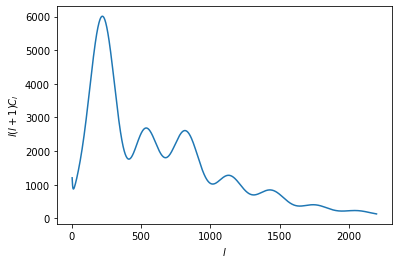

In [ ]:
# Plot power spectrum
fig, ax = plt.subplots()
ax.plot(power_spectrum[:, 0], power_spectrum[:, 1])
ax.set_xlabel('$l$')
ax.set_ylabel('$l(l+1)C_l$')

plt.savefig('power_spectrum.png', dpi=200)
files.download('power_spectrum.png')

## Generating a temperature map
The temperature map is defined by a function:

$\Theta(\mathbf{\hat{n}}) = \sum_{l=0}^{l=\infty} \sum_{m=-l}^{m=l} a_{lm}Y_{lm}(\mathbf{\hat{n}})$

where $Y_{lm}$ is a spherical harmonic. 

For every $l$, we can generate the $a_{lm}$ by defining a Gaussian probability distribution with zero mean and variance $C_l$. The $a_{lm}$ can then be extracted from this distribution. 

### Complex coefficients

Here, the $a_{lm}$ are complex numbers with zero mean and variance $C_l$ for a given $l$.

In [ ]:
# Set maximum for l
lmax = 2200

# Initialise spherical harmonics with coefficients set to zero
clm_complex = pysh.SHCoeffs.from_zeros(lmax, kind='complex', csphase=-1)

# Generate random coefficients (complex) and update
for i, l in enumerate(power_spectrum[:, 0][:lmax-1]):
  C_l = power_spectrum[i, 1]/(l*(l+1))
  m_list = np.arange(-np.int(l), np.int(l)+1, 1)
  a_lm = (np.random.normal(0, 1, size=m_list.shape) + 
          1j*np.random.normal(0, 1, size=m_list.shape))*np.sqrt(C_l/2)
  clm_complex.set_coeffs(values=a_lm, ls=int(l), ms=m_list)


#### Temperature map (complex case)

Here, we plot the temperature map.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

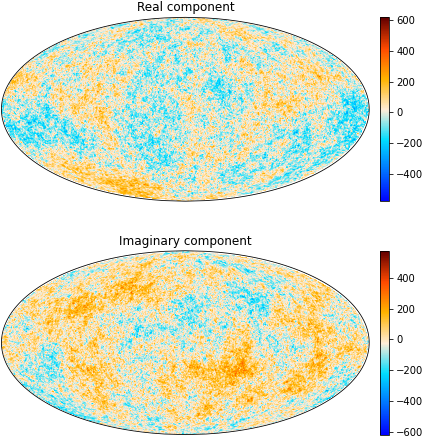

In [ ]:
# Plot temperature map
grid_complex = clm_complex.expand()
fig2, ax2 = grid_complex.plot(cmap=cmap, projection=ccrs.Mollweide(),
                              colorbar='right')
pysh.utils.figstyle(figsize=(10, 8))
plt.savefig('mollweide_1.png', dpi=300)
files.download('mollweide_1.png')

#### Power spectrum (complex case)

Here, we plot the power spectrum of the map to check if it matches our original. There are two plots corresponding to unscaled and scaled spectra.

In [ ]:
# Unscaled power spectrum
fig3, ax3 = clm_complex.plot_spectrum(show=False)

# Scaled power spectrum (multiply by l(l+1)/(2l+1))
fig4, ax4 = plt.subplots()
line = ax3.lines[0]
x = line.get_xdata()
y = line.get_ydata()
y_scaled = np.multiply(y, x*(x+1)/(2*x+1))

ax4.plot(x, y_scaled)
ax4.set_xlabel('$l$')
ax4.set_ylabel('$l(l+1) C_l$')

### Real coefficients

Here, the $a_{lm}$ are real numbers with zero mean and variance $C_l$ for a given $l$.

In [ ]:
# Set maximum for l
lmax = 2200

# Initialise spherical harmonics with coefficients set to zero
clm_real = pysh.SHCoeffs.from_zeros(lmax, kind='real', csphase=-1)

# Generate random coefficients (complex) and update
for i, l in enumerate(power_spectrum[:, 0][:lmax-1]):
  C_l = power_spectrum[i, 1]/(l*(l+1))
  m_list = np.arange(-np.int(l), np.int(l)+1, 1)
  a_lm = np.random.normal(0, np.sqrt(C_l), size=m_list.shape)
  clm_real.set_coeffs(values=a_lm, ls=int(l), ms=m_list)

#### Temperature map (real case)

In [ ]:
# Plot temperature map
grid_real = clm_real.expand()
fig5, ax5 = grid_real.plot(cmap=cmap)
pysh.utils.figstyle(figsize=(10, 8))

#### Power spectrum (real case)

In [ ]:
# Unscaled power spectrum
fig6, ax6 = clm_real.plot_spectrum(show=False)

# Scaled power spectrum (multiply by l(l+1)/(2l+1))
line = ax6.lines[0]
x = line.get_xdata()
y = line.get_ydata()
y_scaled = np.multiply(y, x*(x+1)/(2*x+1))

fig7, ax7 = plt.subplots()
ax7.plot(x, y_scaled)
ax7.set_xlabel('$l$')
ax7.set_ylabel('$l(l+1) C_l$')